# Bank Marketing Campaign

#2 Project: Classification Problem.

The dataset consists of 41188 observations and 20 features. There is an additional 10% stored in another file for testing more computationally expensive models. I can provide the overview of the dataset based on Moro's explanation. I am due to also provide a citation for this dataset, as this is drawn from Moro and his colleagues.

| #  | Variable          | Description                                                                                                                                                             | Type        | Values / Notes                                                                                                                                   |
|----|-------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------|--------------------------------------------------------------------------------------------------------------------------------------------------|
| 1  | age               | Age of the client                                                                                                                                                       | Numeric     | —                                                                                                                                                |
| 2  | job               | Type of job                                                                                                                                                             | Categorical | "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown" |
| 3  | marital           | Marital status                                                                                                                                                          | Categorical | "divorced","married","single","unknown" (note: "divorced" includes widowed)                                                                     |
| 4  | education         | Education level                                                                                                                                                         | Categorical | "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown"                                  |
| 5  | default           | Has credit in default?                                                                                                                                                  | Categorical | "no","yes","unknown"                                                                                                                             |
| 6  | housing           | Has housing loan?                                                                                                                                                       | Categorical | "no","yes","unknown"                                                                                                                             |
| 7  | loan              | Has personal loan?                                                                                                                                                      | Categorical | "no","yes","unknown"                                                                                                                             |
| 8  | contact           | Contact communication type                                                                                                                                             | Categorical | "cellular","telephone"                                                                                                                           |
| 9  | month             | Last contact month of year                                                                                                                                              | Categorical | "jan", "feb", "mar", ..., "nov", "dec"                                                                                                           |
| 10 | day_of_week       | Last contact day of the week                                                                                                                                            | Categorical | "mon","tue","wed","thu","fri"                                                                                                                    |
| 11 | duration          | Last contact duration (seconds)                                                                                                                                         | Numeric     | Highly affects target; should be discarded for real predictive modeling                                                                          |
| 12 | campaign          | Number of contacts during this campaign                                                                                                                                | Numeric     | Includes last contact                                                                                                                            |
| 13 | pdays             | Days since client was last contacted in previous campaign                                                                                                              | Numeric     | 999 = never contacted before                                                                                                                     |
| 14 | previous          | Number of contacts before this campaign                                                                                                                                | Numeric     | —                                                                                                                                                |
| 15 | poutcome          | Outcome of previous campaign                                                                                                                                            | Categorical | "failure","nonexistent","success"                                                                                                                |
| 16 | emp.var.rate      | Employment variation rate (quarterly)                                                                                                                                  | Numeric     | —                                                                                                                                                |
| 17 | cons.price.idx    | Consumer price index (monthly)                                                                                                                                          | Numeric     | —                                                                                                                                                |
| 18 | cons.conf.idx     | Consumer confidence index (monthly)                                                                                                                                    | Numeric     | —                                                                                                                                                |
| 19 | euribor3m         | Euribor 3 month rate (daily)                                                                                                                                            | Numeric     | —                                                                                                                                                |
| 20 | nr.employed       | Number of employees (quarterly)                                                                                                                                        | Numeric     | —                                                                                                                                                |
| 21 | y (target)        | Has the client subscribed a term deposit?                                                                                                                               | Binary      | "yes","no"                                                                                                                                       |

  [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001


The steps I follow will be as follows:
- Dataset Overview
- Data Cleaning
- Exploratory Data Analysis (EDA)
- Data Preprocessing
- Model Selection
- Model Training
- Evaluation Metrics
- Residual Analysis
- Insights
- Next steps?

But first, some problem statement is needed (as described in UCI ML repo for this dataset)

## 1. Problem Statement

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

TL;DR
Target is binary (subscribed or not). The features are separated in 4 groups: bank client's data, current campaign info, social and economic context, and external info (previous campaign info, etc.)

In [152]:
# Library Importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='notebook')

# Preprocess
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer

# Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, make_scorer, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay

import warnings
warnings.filterwarnings('ignore')

In [117]:
bank_train = pd.read_csv('bank-additional/bank-additional-full.csv', delimiter=';')
bank_test = pd.read_csv('bank-additional/bank-additional.csv', delimiter=';')

df_train = bank_train.copy()
df_test = bank_test.copy()

## 2. Data Overview

In [118]:
df_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [119]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## 3. Data Cleaning

In [120]:
df_train.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [121]:
df_train.duplicated().sum()

np.int64(12)

In [122]:
df_train[df_train.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


The duplicated looks fine to me. Since there is only 12, we can take the cautions and drop it. But imma stick with it because the more the merrier (or not).

## 4. EDA

In [123]:
# List of numerical and categorical columns for quick reference
df_train['y'] = df_train['y'].map({'no': 0, 'yes': 1})

numerical_cols = df_train.select_dtypes(include=['number']).columns.tolist()
numerical_cols.remove('y')
categorical_cols = df_train.select_dtypes(exclude=['number']).columns.tolist()

In [124]:
df_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


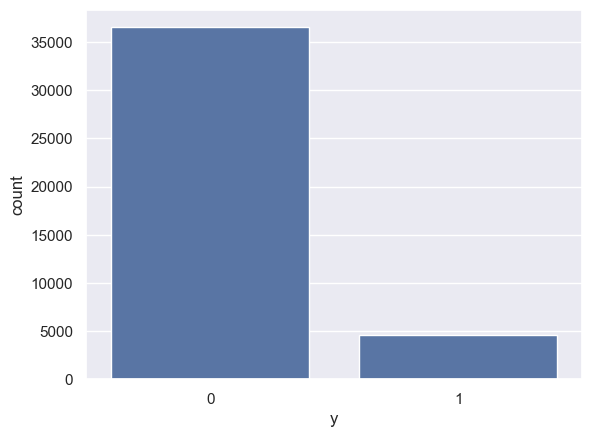

In [125]:
sns.barplot(data=df_train['y'].value_counts())
plt.show()

There is an imbalance in the target variable, which may affect our model later if not properly stratify.

I will generate a plot for each categorical column, in which I group data by the column and do a count of number of subscribed and non-subscribed for the each value of the categorical column.

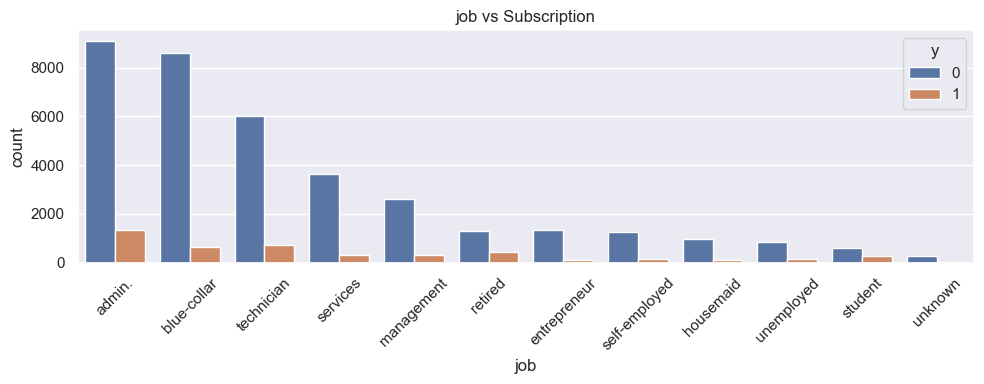

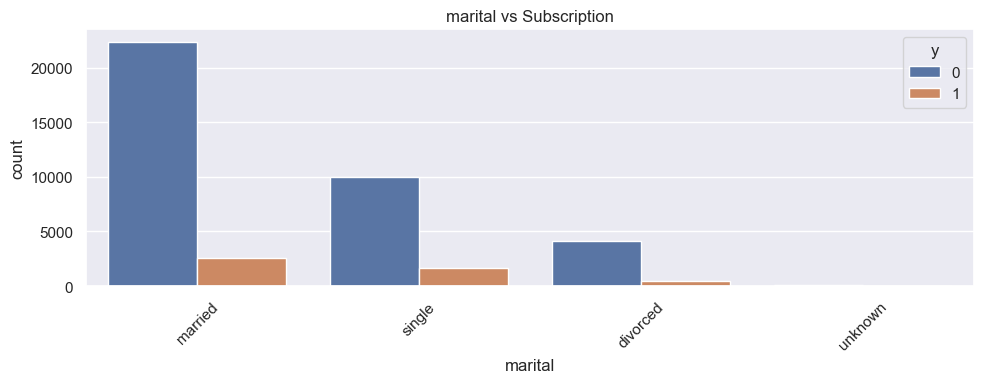

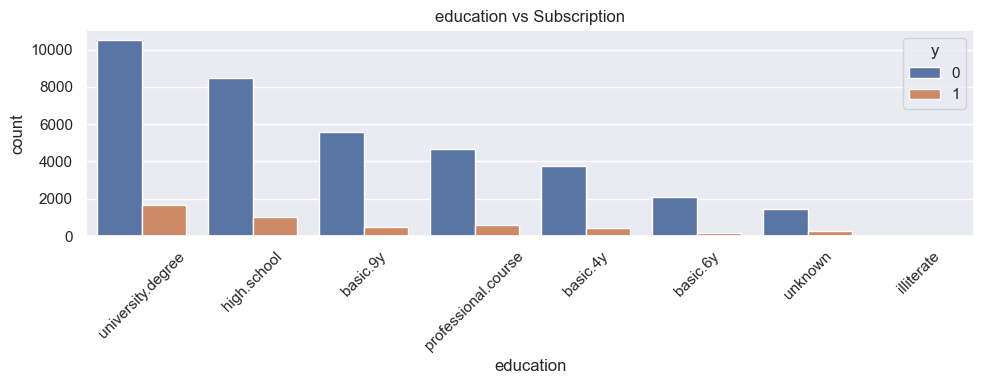

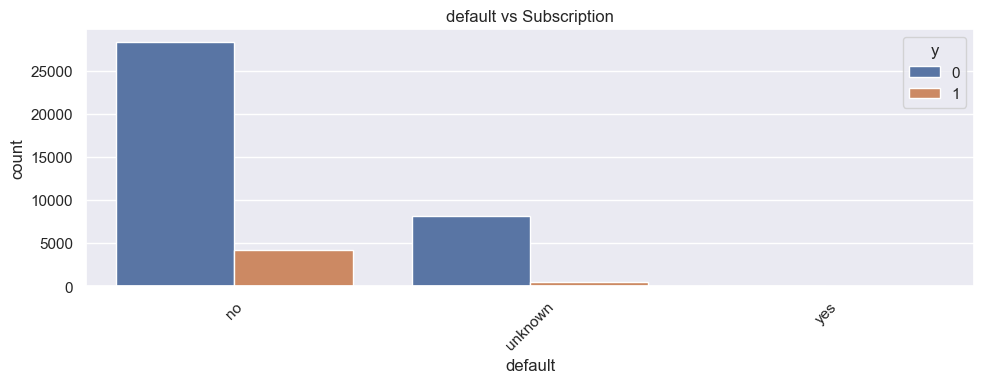

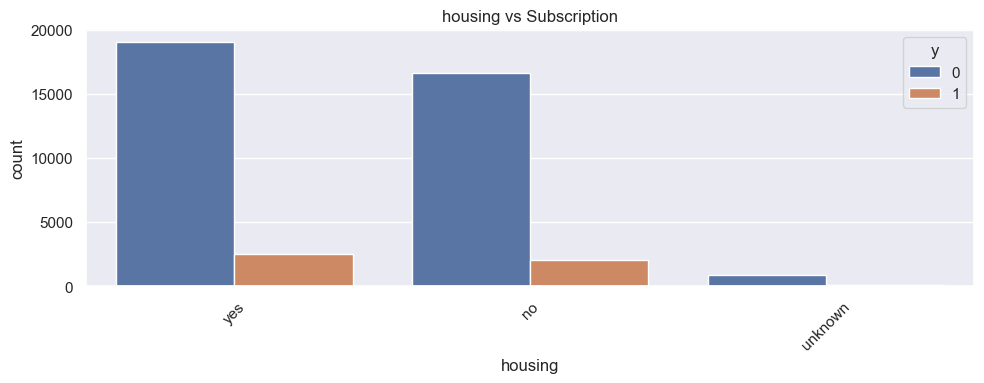

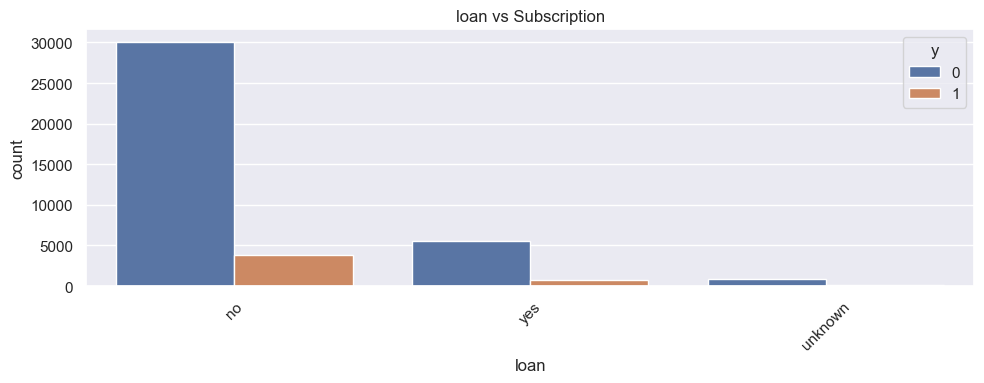

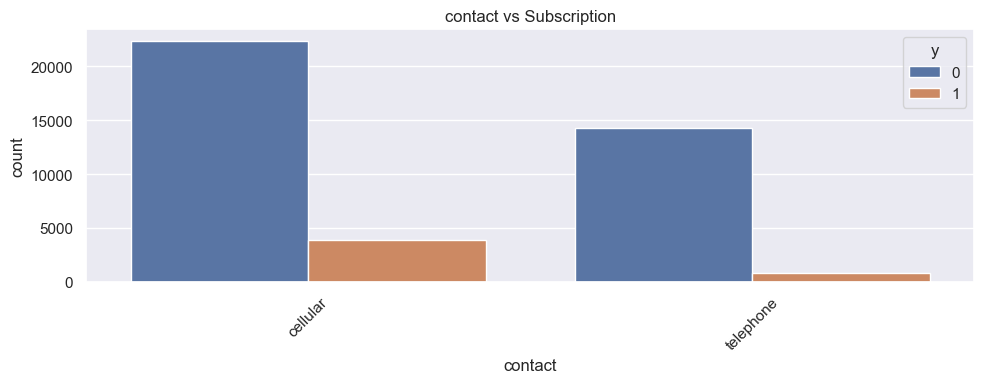

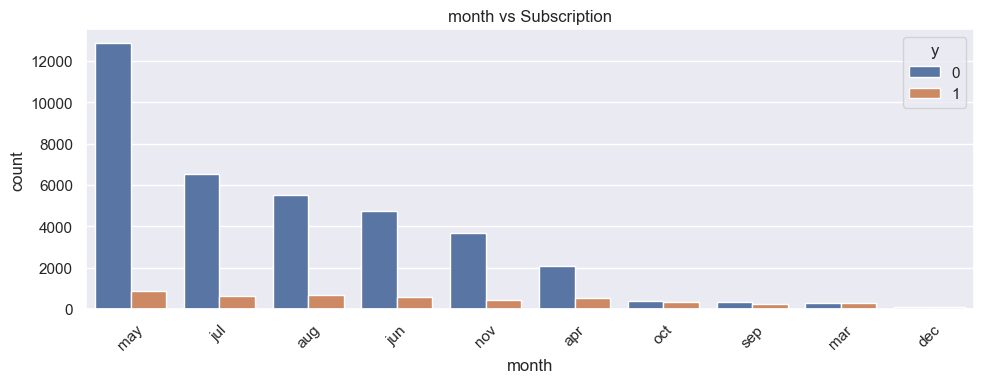

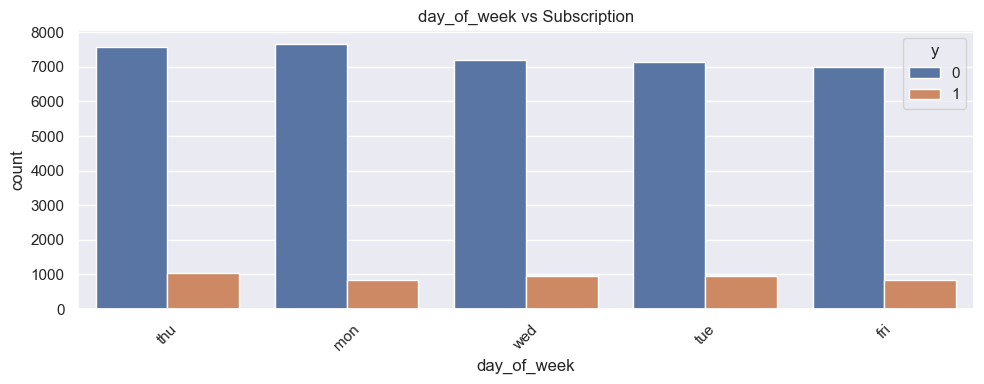

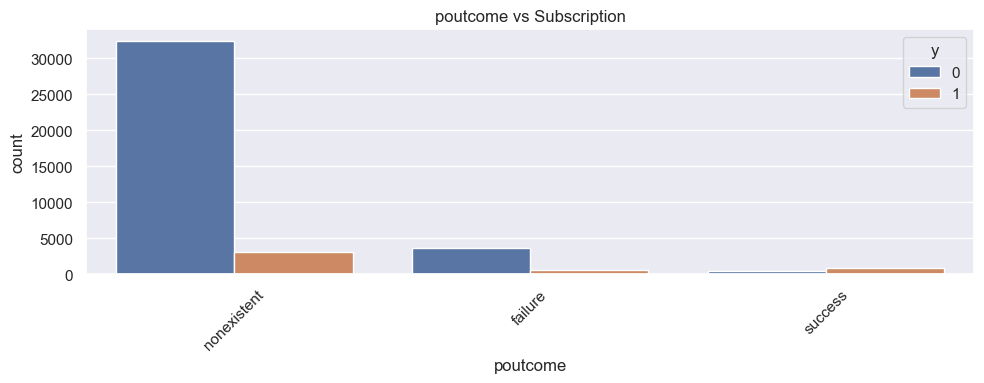

In [126]:
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.barplot(data=df_train.groupby(col)['y'].value_counts().reset_index(), x=col, y='count', hue='y', order=df_train[col].value_counts().index, )
    plt.title(f"{col} vs Subscription")
    plt.xticks(rotation=45)
    plt.tight_layout()


We can first draw some basic insights:
- Job: Admin, blue-collar, technician, and services are the most populated job type.
- Marital: married and single are more inclined to subscribe
- Education: univesity-based and highschool highest in data pop.
- Default: the number of non-default is more inclined to subscribe.
- Housing: it may look the same, but I may need to create another chart for ratio.
- Loan: the number of non-loan is more inclined to subscribe.
- Contact: cellular clients subscribe more.
- Month and DayofWeek: day of week does not provide any pattern, it seems May attracts more data, but the pattern of subscribed does not differ much in month also.

I will also make a ratio of no-to-yes subscribed per type in column. The class imbalance may affect, but overall it gives a general value of the most successful subscribed.

In [127]:
for col in categorical_cols:
    print(f'{col} ratio')
    ratio = df_train.groupby(col)['y'].value_counts().unstack()
    ratio['ratio'] = ratio[1] / ratio[0]
    ratio = ratio.sort_values(by='ratio', ascending=False)
    print(ratio)
    print('-----------------------------------------------')
    print('')

job ratio
y                 0     1     ratio
job                                
student         600   275  0.458333
retired        1286   434  0.337481
unemployed      870   144  0.165517
admin.         9070  1352  0.149063
management     2596   328  0.126348
unknown         293    37  0.126280
technician     6013   730  0.121404
self-employed  1272   149  0.117138
housemaid       954   106  0.111111
entrepreneur   1332   124  0.093093
services       3646   323  0.088590
blue-collar    8616   638  0.074048
-----------------------------------------------

marital ratio
y             0     1     ratio
marital                        
unknown      68    12  0.176471
single     9948  1620  0.162847
divorced   4136   476  0.115087
married   22396  2532  0.113056
-----------------------------------------------

education ratio
y                        0     1     ratio
education                                 
illiterate              14     4  0.285714
unknown               1480   251  0.1

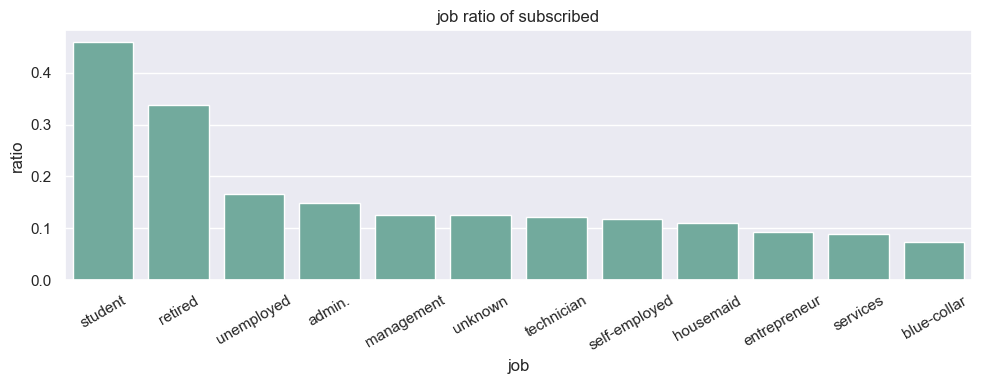

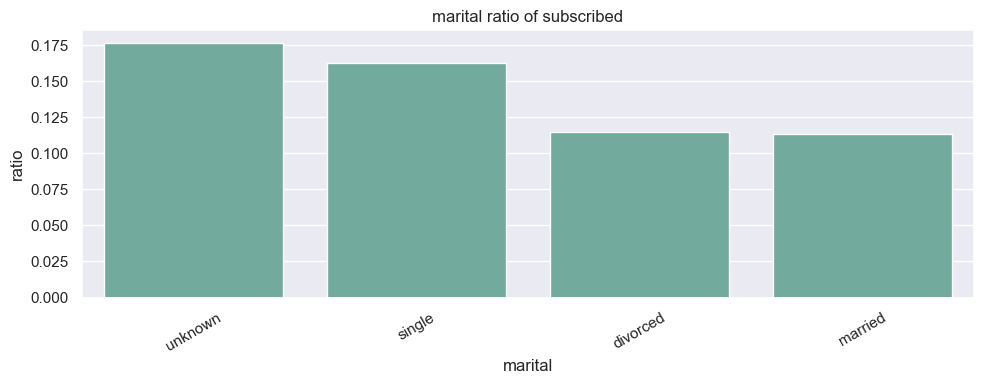

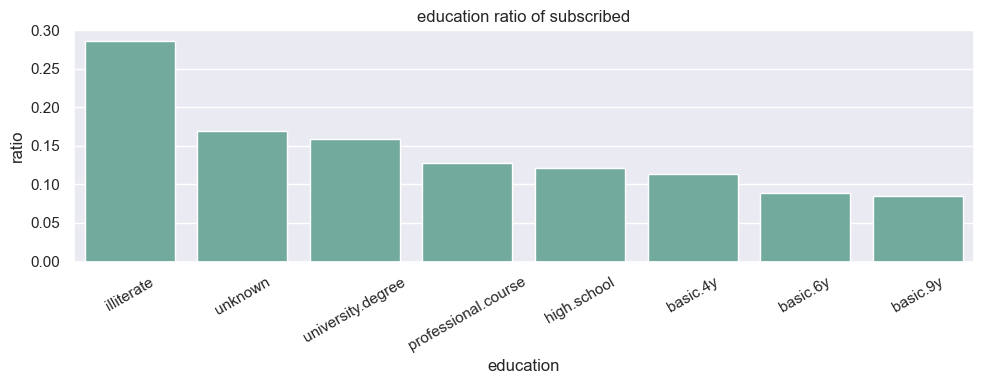

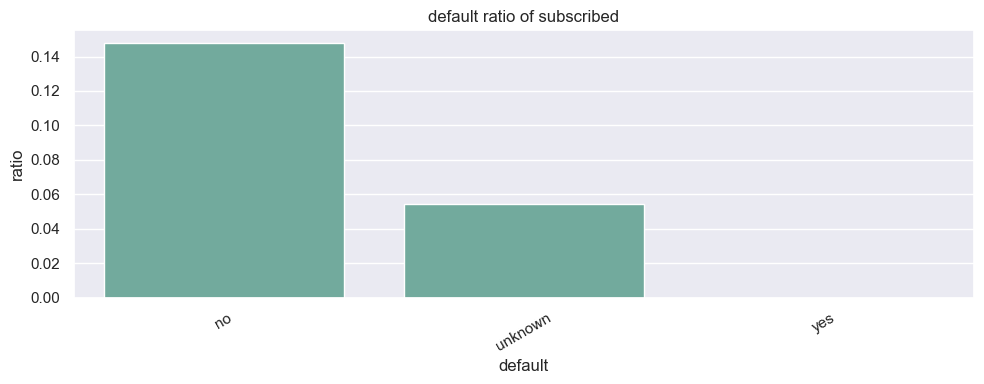

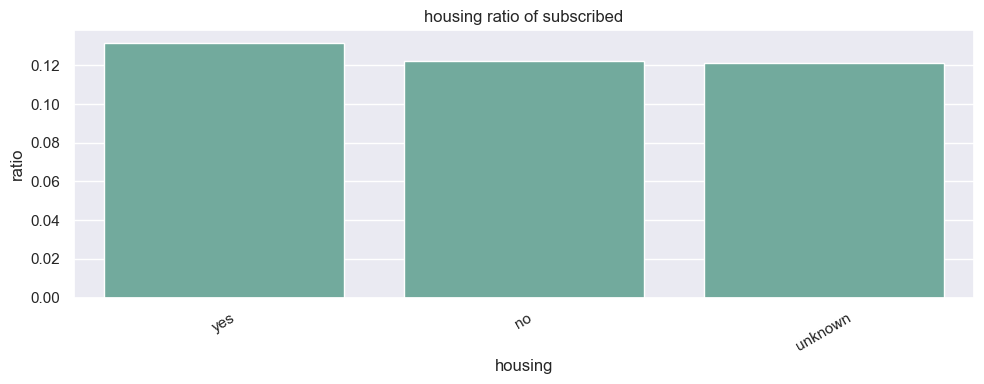

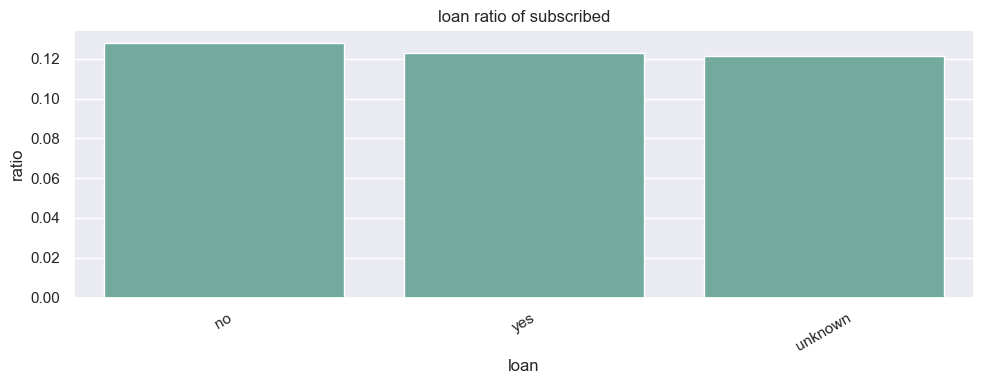

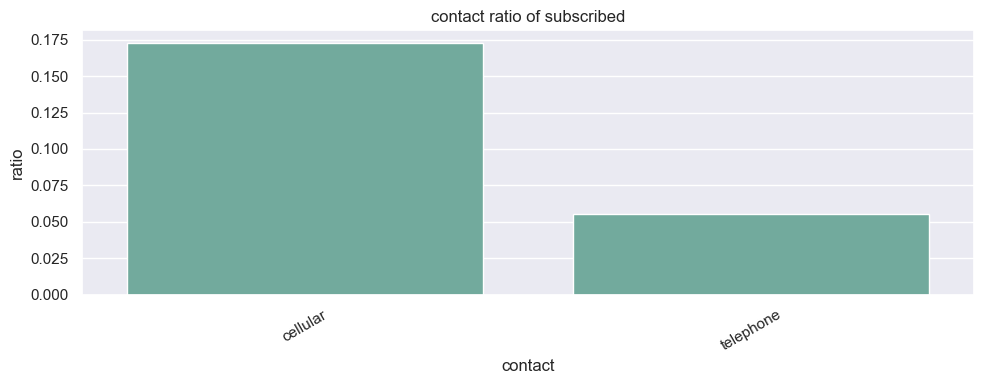

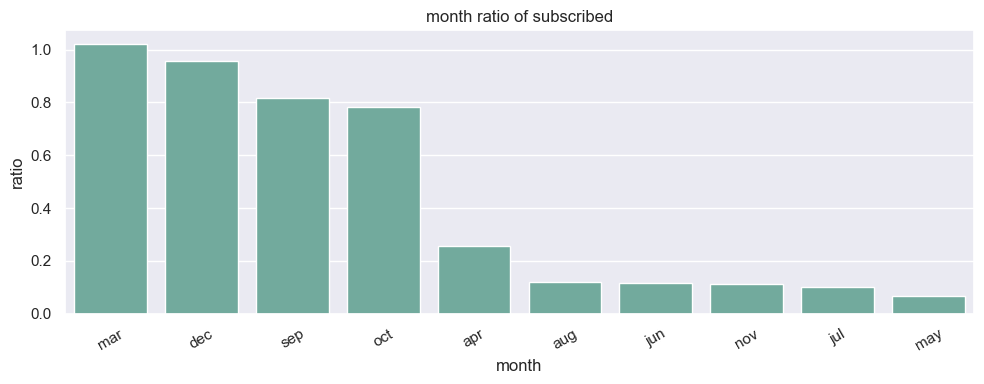

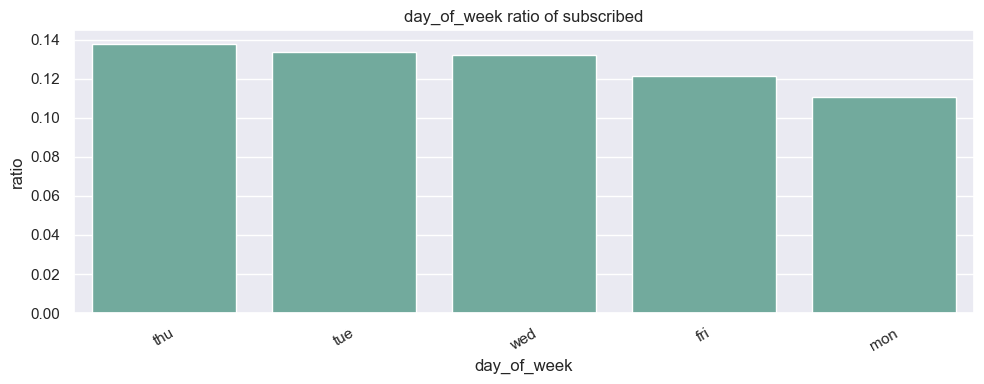

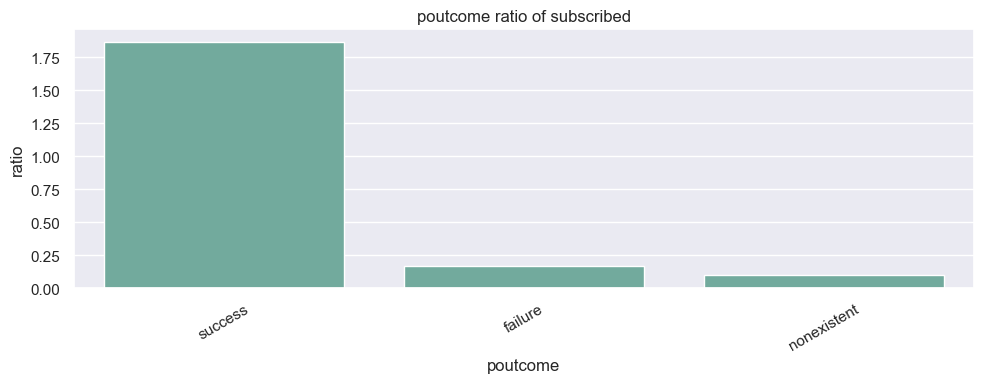

In [128]:
# Visualization of Ratio
for col in categorical_cols:
    ratio = df_train.groupby(col)['y'].value_counts().unstack()
    ratio['ratio'] = ratio[1] / ratio[0]
    plt.figure(figsize=(10, 4))
    sns.barplot(data=ratio.sort_values(by='ratio', ascending=False), x=col, y='ratio', color="#69b3a2", edgecolor="white")
    plt.title(f"{col} ratio of subscribed")
    plt.xticks(rotation=30)
    plt.tight_layout()

According to the ratio:
- **Student** has the highest rate of success with 45.8%, follow by **retired** (33.7%), **unemployed** (16.6%), **admin** (14.9%), **management** (12.6%)
- Even though illiterate has highest rate, we should not consider it too much, because of the low data. Hence, **university degree holders** (15.9%) and **Professional** (12.8%) are among the highest.
- Over the months, **Mar** has the highest rate of success (102.2%), **December** with (95.7%), **September** (81.5%), **October** (78.2%). The month study could consider a few reasons why these months are high (student and university enrolled in these months, business could lock mony in term deposits before the end of financial year).
- For contact, **cellular** has higher ratio (17.3%) compared to telephone (5.5%)
- Even though data pop is not high, **previous client successor** is likely to continue to their term deposit with (186.6%).

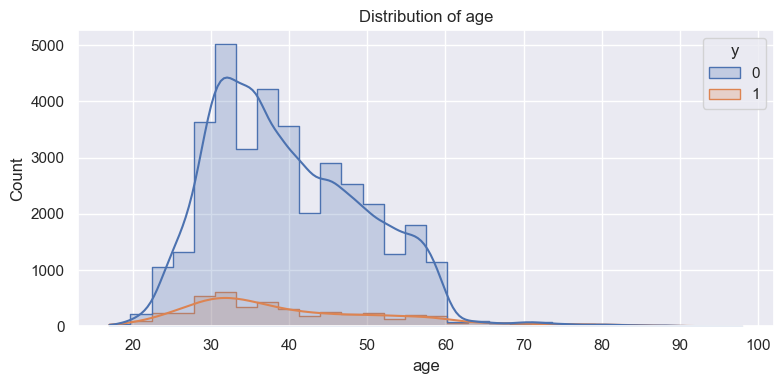

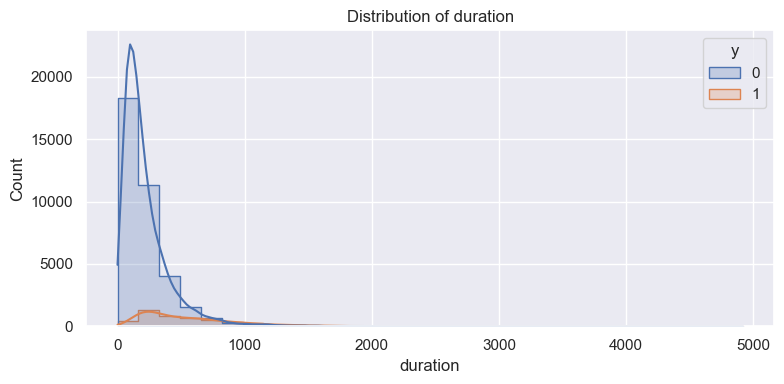

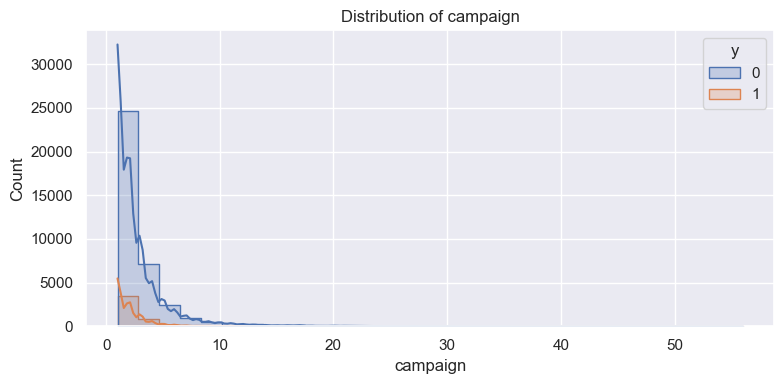

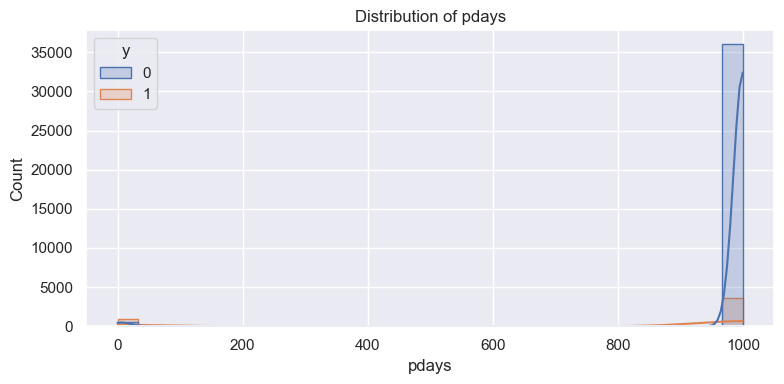

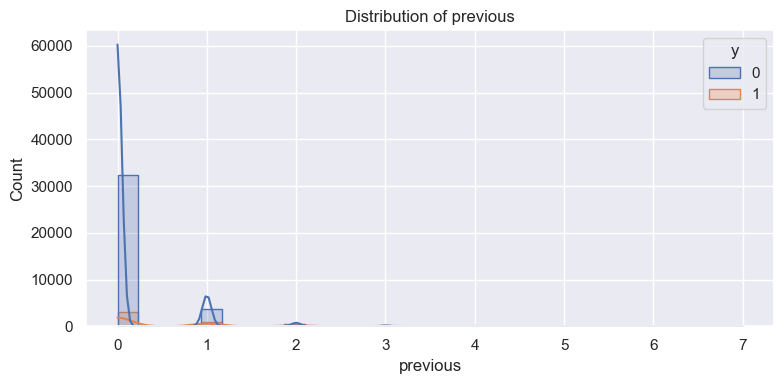

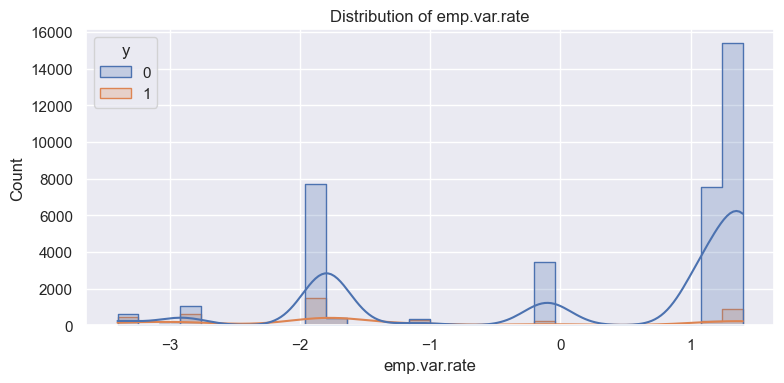

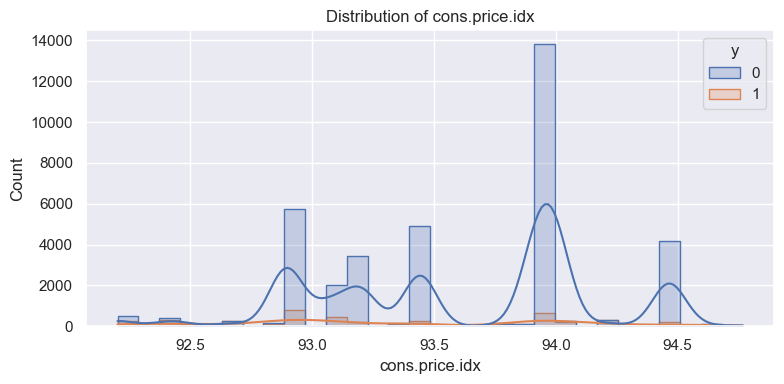

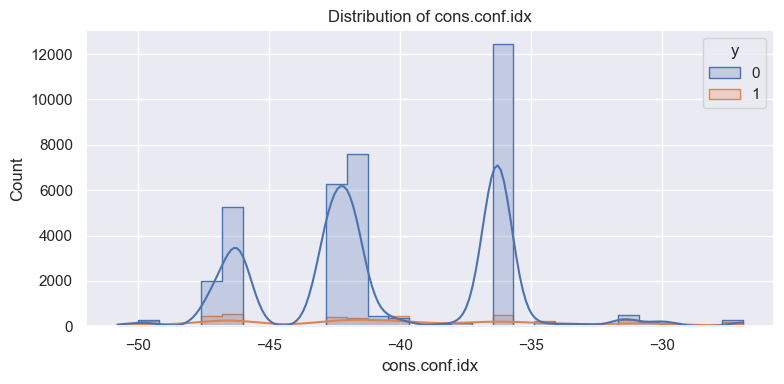

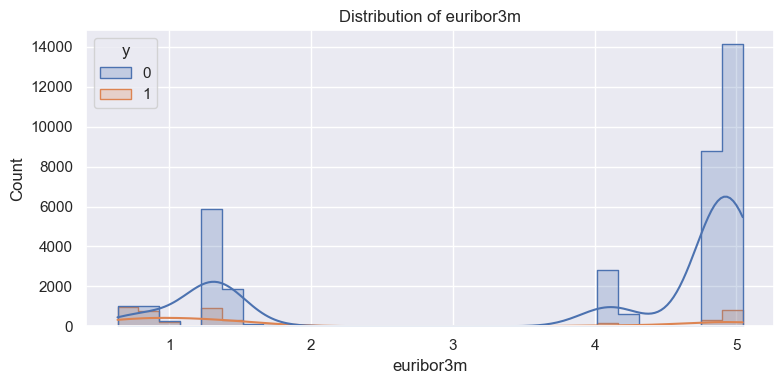

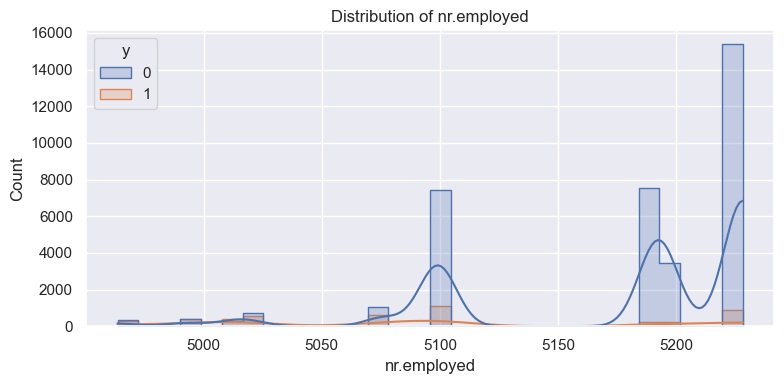

In [129]:
# Distributions
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df_train, x=col, hue='y', kde=True, bins=30, color='#69b3a2', element='step')
    plt.title(f"Distribution of {col}")
    plt.tight_layout()


- May need to transform due to skewed of campaign, pdays, previous. 
- Outliers check for all the numerical columns. I will be using IQR range for detecting upper and lower bound.

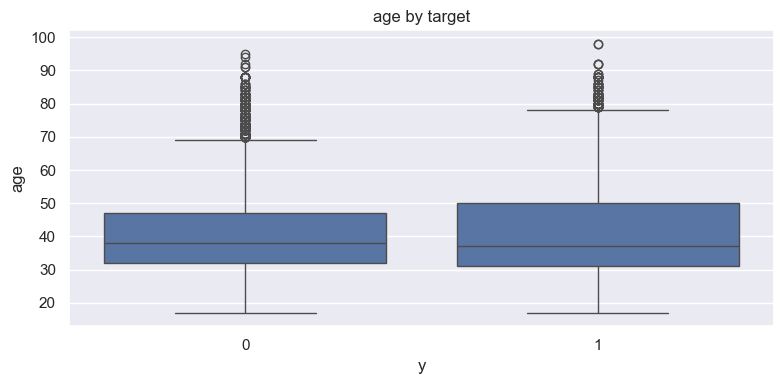

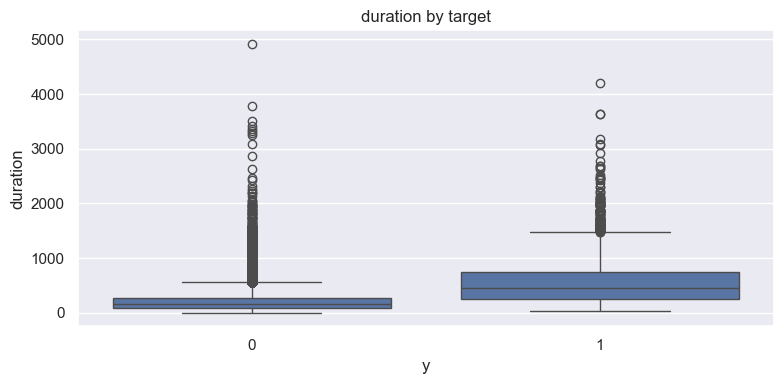

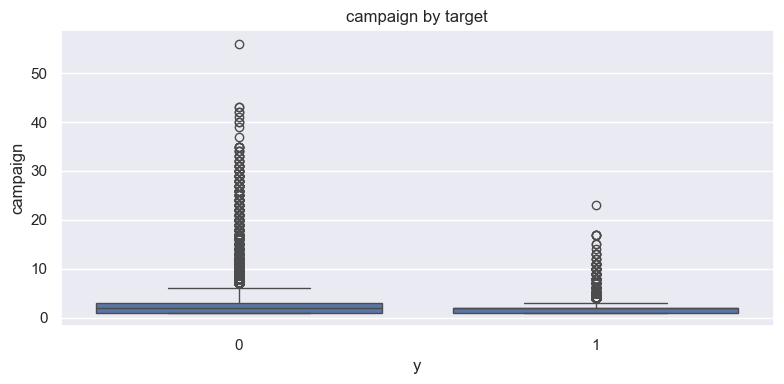

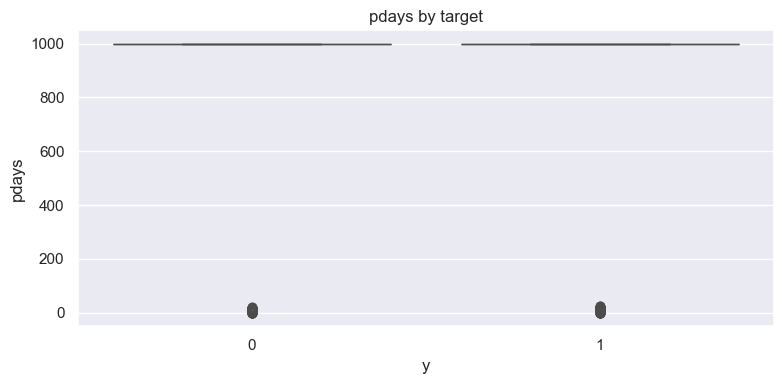

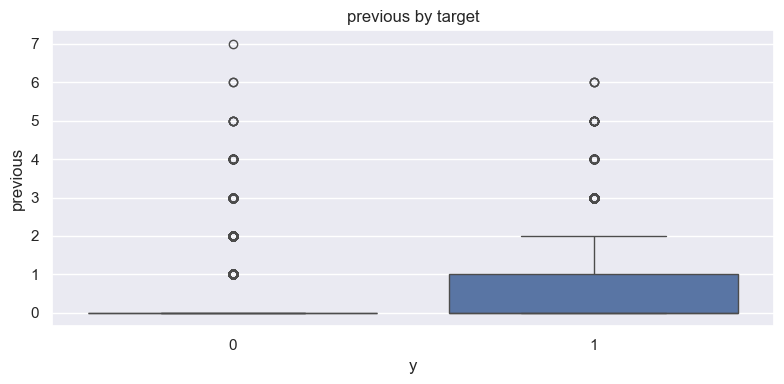

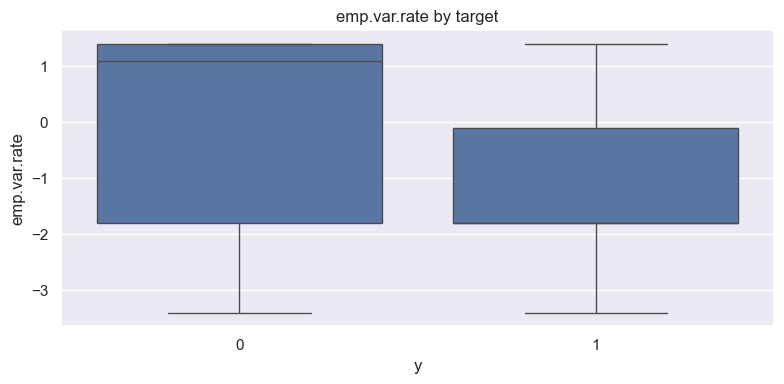

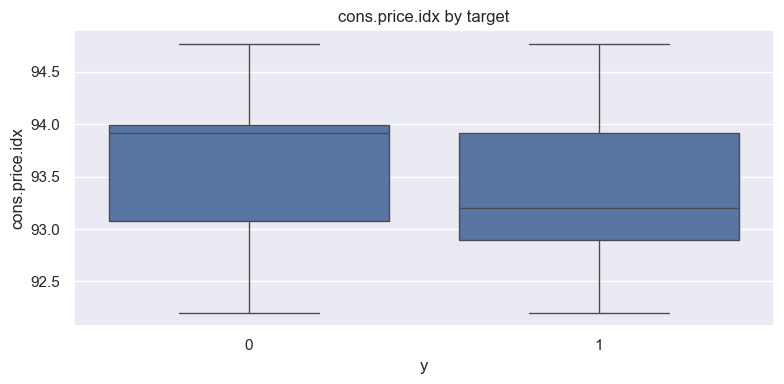

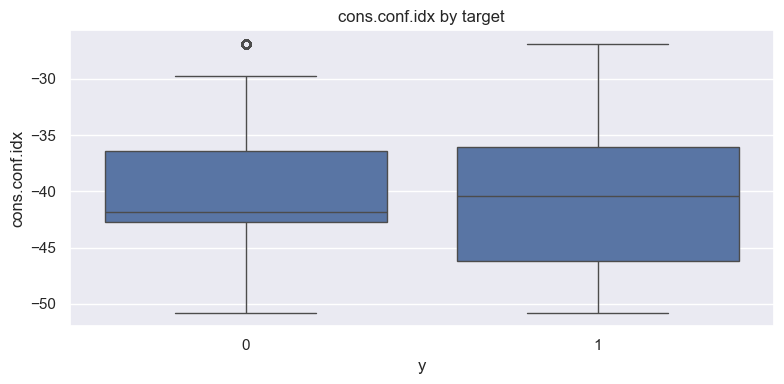

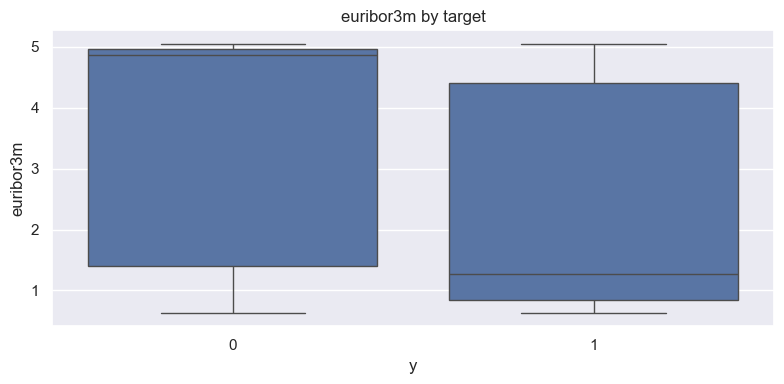

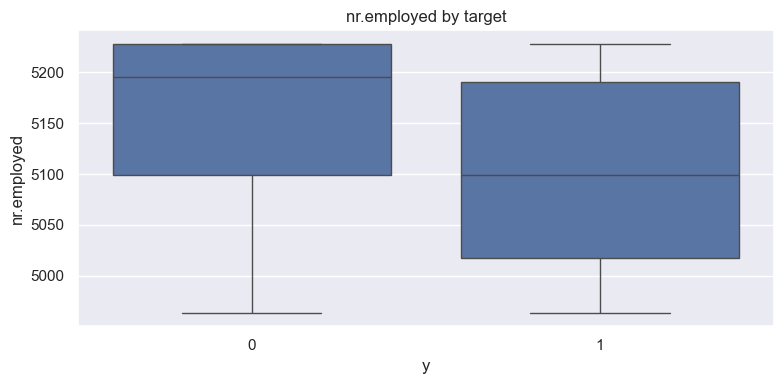

In [130]:
# Checking for outliers
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df_train, x='y', y=col)
    plt.title(f"{col} by target")
    plt.tight_layout()

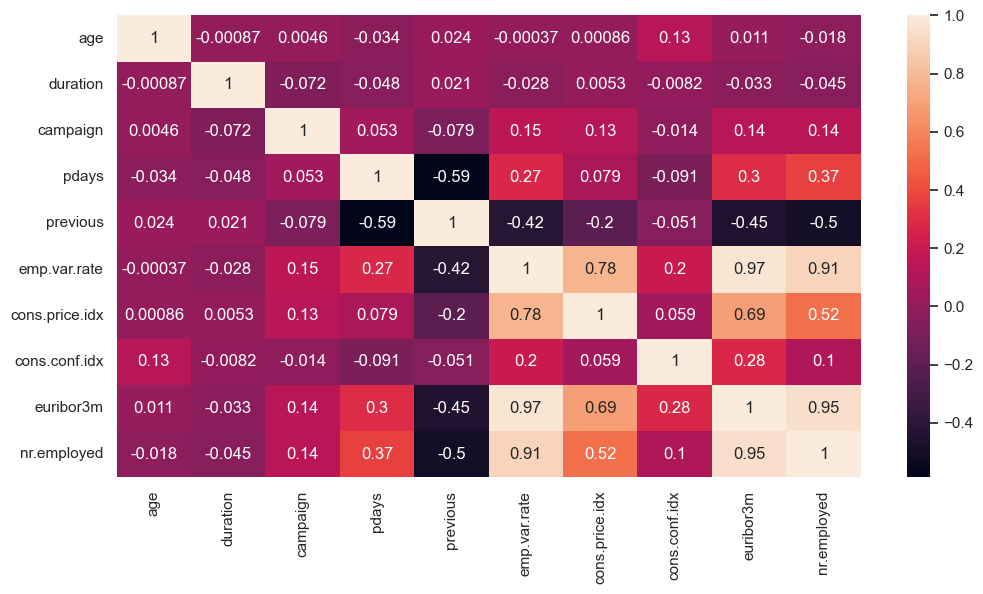

In [131]:
plt.figure(figsize=(12,6))
sns.heatmap(df_train[numerical_cols].corr(), annot=True)
plt.show()

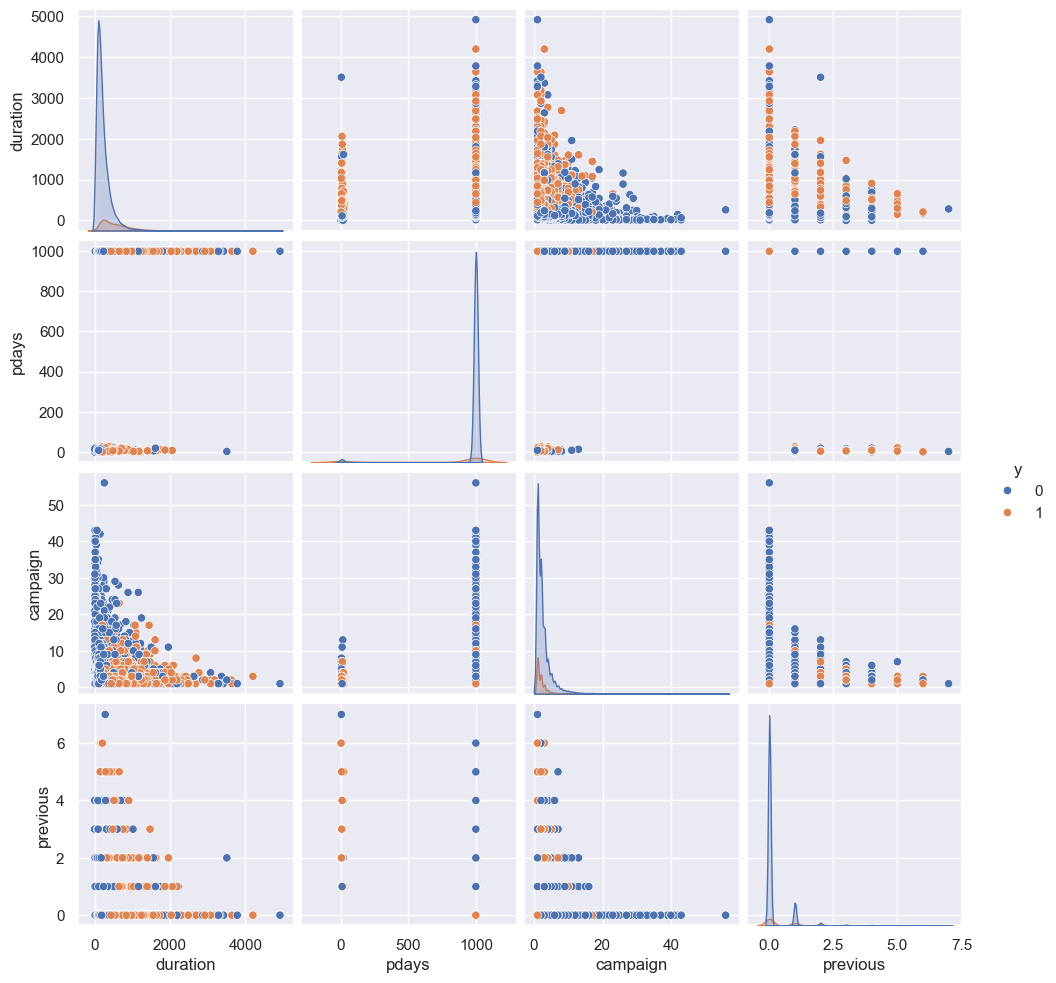

In [132]:
sns.pairplot(df_train[['duration', 'pdays', 'campaign', 'previous', 'y']], hue='y')
plt.show()

The distribution seems overlapped in these case. Hence it might be considered weak features for predicting.

Since duration highly affects the outcome, I will drop it for better predictive modeling.

In [133]:
numerical_cols.remove('duration')

## 5. Data Preprocess

In [134]:
df_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


Some guidelines for encoding categorical features before diving in the actual work:
- Job: since job is nominal, I can use OneHotEncoder or get dummy.
- Marital: marital status is nominal, hence i will also use OHE or dummy
- Education: there's a clear ordinal status between types, hence I use Ordinal Encoding
- Default, Housing, Loan, contact: Since these are binary values with unknowns: I will treat unknown as a valid type where client deny inputting their data, and encode it using get_dummy or OHE.
- day_of_week and month: Cyclical encoding for capturing their circular relationships


In [135]:
day_map = {'mon': 0, 'tue': 1, 'wed': 2, 'thu': 3, 'fri': 4}
month_map = {'jan': 0, 'feb': 1, 'mar': 2, 'apr': 3, 'may': 4, 'jun': 5,
             'jul': 6, 'aug': 7, 'sep': 8, 'oct': 9, 'nov': 10, 'dec': 11}

df_train['day_of_week'] = df_train['day_of_week'].map(day_map)
df_train['month'] = df_train['month'].map(month_map)

In [136]:
ohe_cols = ['job', 'marital', 'default', 'housing', 'loan', 'contact']
ord_cols = ['education']
cyclical_cols = ['day_of_week', 'month']
cyclical_max_vals = [5, 12]

In [137]:
# Custom class for day of week and month of year, using Cyclical Encoding due to its circular nature
class CyclicalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns, max_vals):
        self.columns = columns
        self.max_vals = max_vals
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        for col, max_val in zip(self.columns, self.max_vals):
            X[col + '_sin'] = np.sin(2 * np.pi * X[col] / max_val)
            X[col + '_cos'] = np.cos(2 * np.pi * X[col] / max_val)
            X.drop(columns=[col], inplace=True)
        return X

In [138]:
# Pipeline for numerical and categorical column to pass in ColumnTransformer Object
num_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]
)

ohe_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(handle_unknown='ignore'))
    ]
)

ord_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ordinal', OrdinalEncoder())
    ]
)

cyclical_pipeline = Pipeline(
    steps=[
        ('cyclical', CyclicalEncoder(columns=cyclical_cols, max_vals=cyclical_max_vals))
    ]
)


In [139]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numerical_cols),
        ('onehot', ohe_pipeline, ohe_cols),
        ('ordinal', ord_pipeline, ord_cols),
        ('cyclical', cyclical_pipeline, cyclical_cols)
    ]
)

In [140]:
X = df_train.drop('y', axis=1)
y = df_train['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## 6. Modeling

In [141]:
# Logistic Regression
lr = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(random_state=42))
    ]
)

lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
accuracy_score(y_test, lr_pred)

0.8992473901432386

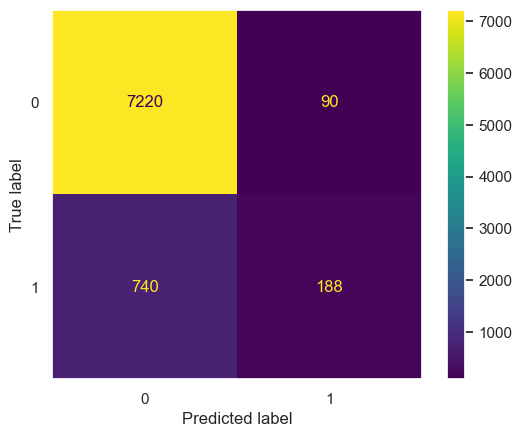

In [158]:
cm = confusion_matrix(y_test, lr_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

ax = plt.gca()
ax.grid(False)

plt.show()

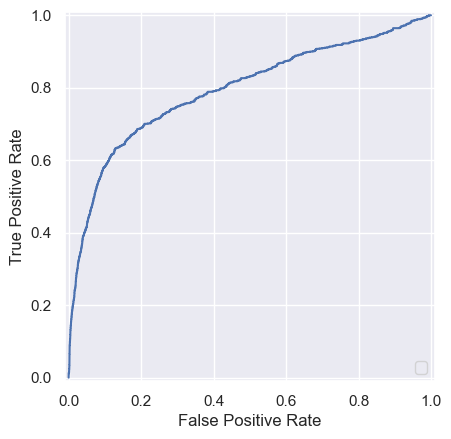

In [166]:
lr_proba = lr.predict_proba(X_test)

fpr, tpr, _ = roc_curve(y_test, lr_proba[:, 1])
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.show()

In [143]:
# Decision Tree
dt = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier(random_state=42))
    ]
)

dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
accuracy_score(y_test, dt_pred)

0.8384316581694586

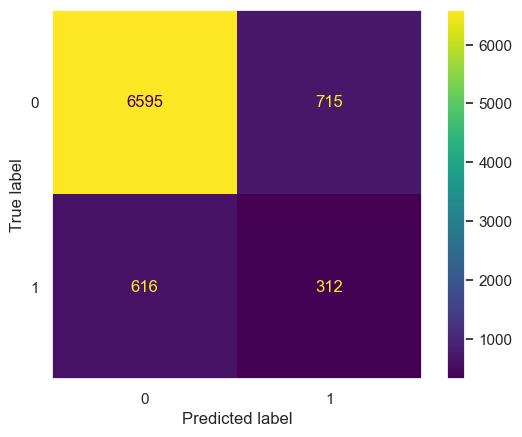

In [157]:
cm = confusion_matrix(y_test, dt_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

ax = plt.gca()
ax.grid(False)

plt.show()

In [145]:
# Random Forest
rf = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=42))
    ]
)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
accuracy_score(y_test, rf_pred)

0.8954843408594318

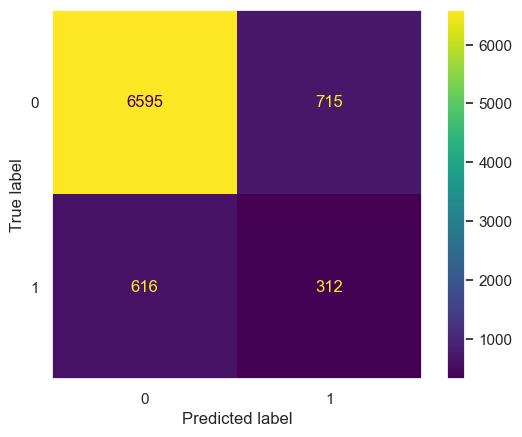

In [156]:
cm = confusion_matrix(y_test, dt_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

ax = plt.gca()
ax.grid(False)

plt.show()

In [147]:
# Gradient Boosting
gb = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', GradientBoostingClassifier(random_state=42))
    ]
)

gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
accuracy_score(y_test, gb_pred)

0.9021607186210245

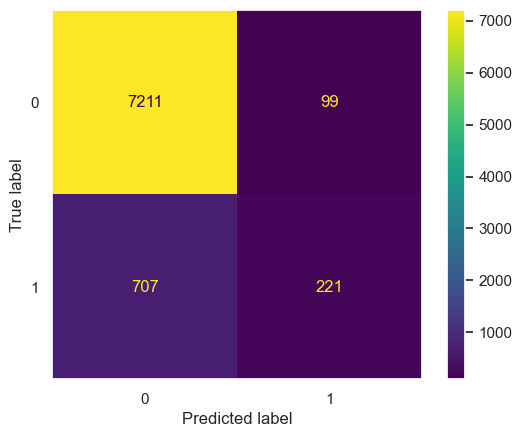

In [153]:
cm = confusion_matrix(y_test, gb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

ax = plt.gca()
ax.grid(False)

plt.show()

In [149]:
# SVM
svm = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', SVC(random_state=42))
    ]
)

svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
accuracy_score(y_test, svm_pred)

0.9002184996358339

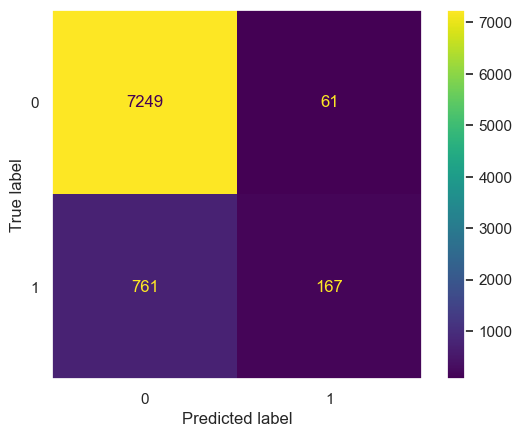

In [154]:
cm = confusion_matrix(y_test, svm_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

ax = plt.gca()
ax.grid(False)

plt.show()